# Random forest from scratch

## prepare data

In [1]:
import pandas as pd
import os
os.environ['MPLCONFIGDIR'] = "/tmp/"
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.txt", delimiter = ' ')
data

,X1,X2,Y
0,2.309572,1.168960,0
1,1.500958,2.535482,0
2,3.107545,2.162569,0
3,4.090033,3.123409,0
4,5.386602,2.109488,0
5,6.451823,0.242952,1
6,6.633670,2.749509,1
7,8.749958,2.676022,1
8,4.589131,0.925340,1
9,6.619323,3.831051,1


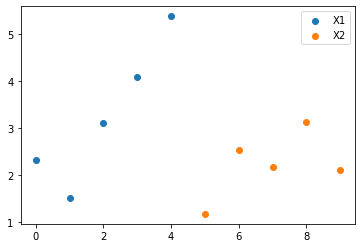

In [3]:
X1 = data.loc[data['Y'] == 0, 'X1'].to_numpy()
X2 = data.loc[data['Y'] == 0, 'X2'].to_numpy()
x1 = [i for i in range(len(X1))]
x2 = [i+5 for i in range(len(x1))]

plt.scatter(x1, X1, label='X1')
plt.scatter(x2, X2, label='X2')
plt.legend()

## Learn the bagged decision tree
Bootstrap Aggregation (Bagging) is a simple and powerful ensemble algorithm.

In [4]:
# model 1
model1_X1_thres = 5.38660215

# model 2
model2_X1_thres = 4.090032824

# model 3
model3_X2_thres = 0.925340325

## make prediction with bagged decision trees

In [5]:
def acc_calc(Y, Group):
    Group = [0 if Group[i] == 'LEFT' else 1 for i in range(len(Group))]
    success = 0
    for i in range(len(Y)):
        if Y[i] == Group[i]:
            success += 1
    return success / len(Y)

### decision stump model 1

In [6]:
group = []
for i in range(len(data)):
    group.append('LEFT' if data['X1'][i] <= model1_X1_thres else 'RIGHT')
data['Group_model1'] = group

data

,X1,X2,Y,Group_model1
0,2.309572,1.168960,0,LEFT
1,1.500958,2.535482,0,LEFT
2,3.107545,2.162569,0,LEFT
3,4.090033,3.123409,0,LEFT
4,5.386602,2.109488,0,LEFT
5,6.451823,0.242952,1,RIGHT
6,6.633670,2.749509,1,RIGHT
7,8.749958,2.676022,1,RIGHT
8,4.589131,0.925340,1,LEFT
9,6.619323,3.831051,1,RIGHT


In [7]:
print(acc_calc(data['Y'], data['Group_model1']))

0.9


### decision stump model 2

In [8]:
group = []
for i in range(len(data)):
    group.append('LEFT' if data['X1'][i] <= model2_X1_thres else 'RIGHT')
data['Group_model2'] = group

data

,X1,X2,Y,Group_model1,Group_model2
0,2.309572,1.168960,0,LEFT,LEFT
1,1.500958,2.535482,0,LEFT,LEFT
2,3.107545,2.162569,0,LEFT,LEFT
3,4.090033,3.123409,0,LEFT,LEFT
4,5.386602,2.109488,0,LEFT,RIGHT
5,6.451823,0.242952,1,RIGHT,RIGHT
6,6.633670,2.749509,1,RIGHT,RIGHT
7,8.749958,2.676022,1,RIGHT,RIGHT
8,4.589131,0.925340,1,LEFT,RIGHT
9,6.619323,3.831051,1,RIGHT,RIGHT


In [9]:
print(acc_calc(data['Y'], data['Group_model2']))

0.9


### decision stump model 3

In [10]:
group = []
for i in range(len(data)):
    group.append('LEFT' if data['X2'][i] > model3_X2_thres else 'RIGHT')
data['Group_model3'] = group

data

,X1,X2,Y,Group_model1,Group_model2,Group_model3
0,2.309572,1.168960,0,LEFT,LEFT,LEFT
1,1.500958,2.535482,0,LEFT,LEFT,LEFT
2,3.107545,2.162569,0,LEFT,LEFT,LEFT
3,4.090033,3.123409,0,LEFT,LEFT,LEFT
4,5.386602,2.109488,0,LEFT,RIGHT,LEFT
5,6.451823,0.242952,1,RIGHT,RIGHT,RIGHT
6,6.633670,2.749509,1,RIGHT,RIGHT,LEFT
7,8.749958,2.676022,1,RIGHT,RIGHT,LEFT
8,4.589131,0.925340,1,LEFT,RIGHT,RIGHT
9,6.619323,3.831051,1,RIGHT,RIGHT,LEFT


In [11]:
print(acc_calc(data['Y'], data['Group_model3']))

0.7


### final prediction
selecet the most common value in three individual models

In [12]:
data['prediction'] = data.loc[:, 'Group_model1':].mode(axis=1)
data

,X1,X2,Y,Group_model1,Group_model2,Group_model3,prediction
0,2.309572,1.168960,0,LEFT,LEFT,LEFT,LEFT
1,1.500958,2.535482,0,LEFT,LEFT,LEFT,LEFT
2,3.107545,2.162569,0,LEFT,LEFT,LEFT,LEFT
3,4.090033,3.123409,0,LEFT,LEFT,LEFT,LEFT
4,5.386602,2.109488,0,LEFT,RIGHT,LEFT,LEFT
5,6.451823,0.242952,1,RIGHT,RIGHT,RIGHT,RIGHT
6,6.633670,2.749509,1,RIGHT,RIGHT,LEFT,RIGHT
7,8.749958,2.676022,1,RIGHT,RIGHT,LEFT,RIGHT
8,4.589131,0.925340,1,LEFT,RIGHT,RIGHT,RIGHT
9,6.619323,3.831051,1,RIGHT,RIGHT,LEFT,RIGHT


In [13]:
print(acc_calc(data['Y'], data['prediction']))

1.0
